In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

[TLDR - Jump to Findings/Recommendations](#Overall-Findings-/-Analyses-/-Recommendations)

In [2]:
data = pd.read_csv('netflix_titles.csv')

In [3]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
data.shape

(8807, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
data.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [7]:
data.duplicated().sum()

0

In [8]:
data.isnull().sum().sort_values(ascending=False)

director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
dtype: int64

In [9]:
data.shape[0]

8807

In [10]:
#missing values in percentage
round((data.isnull().sum()/data.shape[0]) * 100,2).sort_values(ascending=False)

director        29.91
country          9.44
cast             9.37
date_added       0.11
rating           0.05
duration         0.03
show_id          0.00
type             0.00
title            0.00
release_year     0.00
listed_in        0.00
description      0.00
dtype: float64

### Duration

In [11]:
data.duration.value_counts().index.to_list() # Mix of seasons and time.

['1 Season',
 '2 Seasons',
 '3 Seasons',
 '90 min',
 '94 min',
 '97 min',
 '93 min',
 '91 min',
 '95 min',
 '96 min',
 '92 min',
 '102 min',
 '98 min',
 '99 min',
 '101 min',
 '88 min',
 '103 min',
 '106 min',
 '100 min',
 '89 min',
 '104 min',
 '86 min',
 '105 min',
 '87 min',
 '107 min',
 '110 min',
 '4 Seasons',
 '108 min',
 '116 min',
 '112 min',
 '85 min',
 '113 min',
 '109 min',
 '111 min',
 '84 min',
 '118 min',
 '83 min',
 '5 Seasons',
 '119 min',
 '81 min',
 '115 min',
 '117 min',
 '120 min',
 '114 min',
 '121 min',
 '82 min',
 '124 min',
 '127 min',
 '122 min',
 '78 min',
 '123 min',
 '126 min',
 '80 min',
 '133 min',
 '128 min',
 '130 min',
 '135 min',
 '137 min',
 '132 min',
 '125 min',
 '75 min',
 '79 min',
 '131 min',
 '6 Seasons',
 '72 min',
 '63 min',
 '129 min',
 '76 min',
 '61 min',
 '74 min',
 '73 min',
 '77 min',
 '60 min',
 '71 min',
 '66 min',
 '69 min',
 '70 min',
 '140 min',
 '65 min',
 '58 min',
 '59 min',
 '68 min',
 '54 min',
 '46 min',
 '62 min',
 '53 min',


In [12]:
data[data.duration.isnull()]
#looks like missing values for duration was mistakenly inputed into rating column.

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [13]:
imputeDuration = data['rating'][data.duration.isnull()]
imputeRatingIndex = data['rating'][data.duration.isnull()].index

In [ ]:
#replace duration missing values with rating value
data['duration'][data.duration.isnull()] = imputeDuration

In [ ]:
#set incorrectly inputed rating data to null
data['rating'][imputeRatingIndex] = np.nan

In [16]:
data.loc[[5541,5794,5813]]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,NaN,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,NaN,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,NaN,66 min,Movies,The comic puts his trademark hilarious/thought...


In [17]:
data['duration'][data['type'] == 'TV Show'].value_counts()

1 Season      1793
2 Seasons      425
3 Seasons      199
4 Seasons       95
5 Seasons       65
6 Seasons       33
7 Seasons       23
8 Seasons       17
9 Seasons        9
10 Seasons       7
13 Seasons       3
15 Seasons       2
12 Seasons       2
11 Seasons       2
17 Seasons       1
Name: duration, dtype: int64

In [18]:
data['duration'][data['type'] == 'Movie'].value_counts().index.to_list()

['90 min',
 '94 min',
 '97 min',
 '93 min',
 '91 min',
 '95 min',
 '96 min',
 '92 min',
 '102 min',
 '98 min',
 '99 min',
 '101 min',
 '88 min',
 '103 min',
 '106 min',
 '100 min',
 '89 min',
 '104 min',
 '86 min',
 '105 min',
 '87 min',
 '107 min',
 '110 min',
 '108 min',
 '116 min',
 '112 min',
 '85 min',
 '113 min',
 '109 min',
 '84 min',
 '111 min',
 '83 min',
 '118 min',
 '119 min',
 '81 min',
 '115 min',
 '117 min',
 '114 min',
 '120 min',
 '121 min',
 '82 min',
 '124 min',
 '127 min',
 '78 min',
 '122 min',
 '123 min',
 '126 min',
 '80 min',
 '133 min',
 '128 min',
 '130 min',
 '135 min',
 '137 min',
 '132 min',
 '125 min',
 '75 min',
 '79 min',
 '131 min',
 '72 min',
 '129 min',
 '74 min',
 '63 min',
 '76 min',
 '61 min',
 '73 min',
 '77 min',
 '66 min',
 '60 min',
 '70 min',
 '69 min',
 '71 min',
 '65 min',
 '140 min',
 '59 min',
 '58 min',
 '68 min',
 '53 min',
 '54 min',
 '46 min',
 '62 min',
 '64 min',
 '24 min',
 '136 min',
 '143 min',
 '134 min',
 '139 min',
 '67 min',
 '

Movies are in minutes and TV Shows are in Seasons

In [19]:
data['duration'] = data['duration'].apply(lambda x: int(x.split(' ')[0]))

In [20]:
data['duration']

0        90
1         2
2         1
3         1
4         2
       ... 
8802    158
8803      2
8804     88
8805     88
8806    111
Name: duration, Length: 8807, dtype: int64

In [21]:
data['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

([<matplotlib.patches.Wedge at 0x256447d56d0>,
 [Text(-0.6357552620136555, 0.897672126570692, 'Movie'),
  Text(0.6357552620136554, -0.8976721265706921, 'TV Show')],
 [Text(-0.3467755974619939, 0.4896393417658319, '69.62%'),
  Text(0.3467755974619938, -0.48963934176583196, '30.38%')])

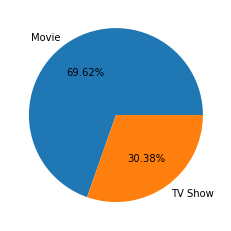

In [22]:
fig, ax = plt.subplots()
plt.pie(data['type'].value_counts(), labels=data['type'].value_counts().index, autopct='%4.2f%%')

In [23]:
maxDuration = data['duration'][data['type'] == 'Movie'].max()

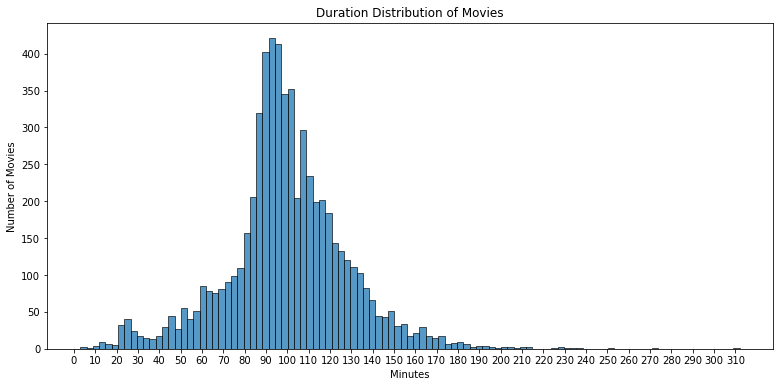

In [24]:
fig, ax = plt.subplots(figsize=(13,6))
sns.histplot(x=data['duration'][data['type'] == 'Movie'])
ax.set_title('Duration Distribution of Movies')
ax.set_xlabel("Minutes")
ax.set_ylabel("Number of Movies")
ax.set_xticks(np.arange(0, maxDuration, 10));

Most common duration for movies are within 90-100 minutes

In [25]:
data[(data['type'] == 'Movie') & (data['duration'] < 20)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
71,s72,Movie,A StoryBots Space Adventure,David A. Vargas,"Evan Spiridellis, Erin Fitzgerald, Jeff Gill, ...",NaN,"September 14, 2021",2021,TV-Y,13,Children & Family Movies,Join the StoryBots and the space travelers of ...
694,s695,Movie,Aziza,Soudade Kaadan,"Caress Bashar, Abdel Moneim Amayri","Lebanon, Syria","June 17, 2021",2019,TV-PG,13,"Comedies, Dramas, Independent Movies",This short film follows a newly displaced Syri...
695,s696,Movie,Besieged Bread,Soudade Kaadan,"Lama Hakeim, Gabriel Malki, Ehab Shaaban",NaN,"June 17, 2021",2015,TV-14,12,"Dramas, International Movies","In battle-ridden Syria, a woman trying to smug..."
991,s992,Movie,One Like It,Marwan Nabil,"Riham Abdel Ghafour, Mohammed Aly Rizk, Hazem ...",Egypt,"April 23, 2021",2020,TV-G,15,"Dramas, Independent Movies, International Movies",This short film follows a day in the life of a...
1425,s1426,Movie,Creating The Queen's Gambit,NaN,NaN,United States,"January 8, 2021",2021,TV-14,14,Documentaries,A fascinating character. Exquisite sets. A wig...
1484,s1485,Movie,Cops and Robbers,"Arnon Manor, Timothy Ware-Hill",Timothy Ware-Hill,United States,"December 28, 2020",2020,PG-13,8,Dramas,Animation and activism unite in this multimedi...
1557,s1558,Movie,Canvas,Frank E. Abney III,NaN,United States,"December 11, 2020",2020,G,9,"Children & Family Movies, Dramas","After a heartbreaking loss, a grandfather stru..."
1669,s1670,Movie,If Anything Happens I Love You,"Will McCormack, Michael Govier",NaN,United States,"November 20, 2020",2020,PG,13,Dramas,Grieving parents journey through an emotional ...
1745,s1746,Movie,Ya no estoy aquí: Una conversación entre Guill...,NaN,"Guillermo del Toro, Alfonso Cuarón",NaN,"November 3, 2020",2020,TV-PG,15,Documentaries,Guillermo del Toro and Alfonso Cuarón discuss ...
2109,s2110,Movie,John Was Trying to Contact Aliens,NaN,NaN,United States,"August 20, 2020",2020,TV-PG,17,"Documentaries, LGBTQ Movies",A rural electronics whiz broadcasts radio sign...


Short films under 20 minutes are also categorized as Movies

Text(0, 0.5, 'Number of TV Shows')

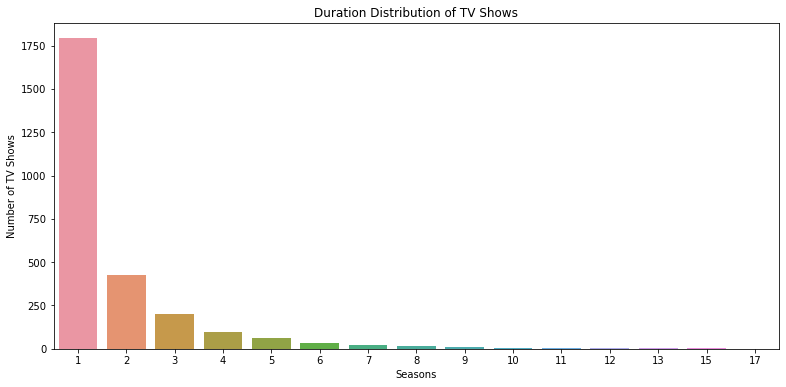

In [26]:
fig, ax = plt.subplots(figsize=(13,6))
sns.barplot(x=data['duration'][data['type'] == 'TV Show'].value_counts().index, y=data['duration'][data['type'] == 'TV Show'].value_counts())
ax.set_title('Duration Distribution of TV Shows')
ax.set_xlabel("Seasons")
ax.set_ylabel("Number of TV Shows")

Most TV shows have only 1 Season.

### Rating

In [27]:
data[data.rating.isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,NaN,74,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,NaN,84,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,NaN,66,Movies,The comic puts his trademark hilarious/thought...
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115,Dramas,"Amid the chaos and horror of World War II, a c..."


In [28]:
len(data.rating[data.rating.isnull()])

7

In [ ]:
#impute missing values for rating columns with "NR"
data.rating[data.rating.isnull()] = 'NR'

Text(0, 0.5, 'Number of Movies/TV Shows')

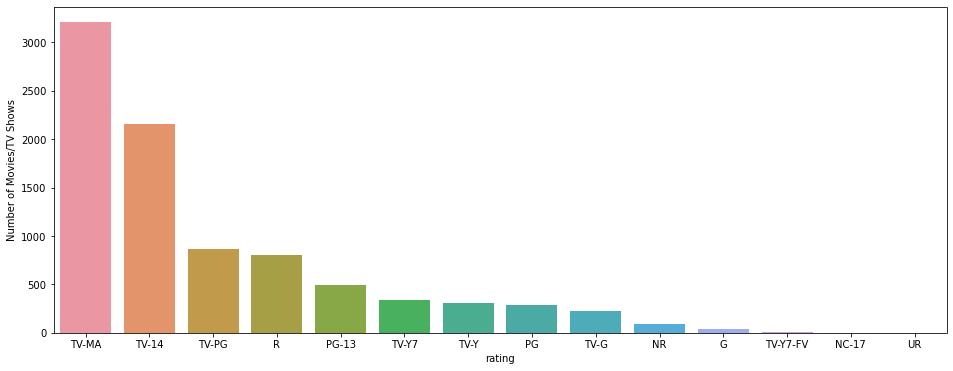

In [30]:
fig, ax = plt.subplots(figsize=(16,6))
sns.countplot(data=data, x='rating', order = data['rating'].value_counts().index)
ax.set_ylabel("Number of Movies/TV Shows")

Hard to tell the ratings apart. Categorize ratings by adults/teenagers/kids shows

In [31]:
data.rating.value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            87
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64

In [32]:
ratings = data.rating.value_counts().index.tolist()

### Netflix Guidelines
#### Kids
TV-Y: Designed to be appropriate for all children  
TV-Y7: Suitable for ages 7 and up  
G: Suitable for General Audiences  
TV-G: Suitable for General Audiences  
PG: Parental Guidance suggested  
TV-PG: Parental Guidance suggested  
#### Teens
PG-13: Parents strongly cautioned. May be Inappropriate for ages 12 and under.  
TV-14: Parents strongly cautioned. May not be suitable for ages 14 and under.  
#### Adults
R: Restricted. May be inappropriate for ages 17 and under.  
TV-MA: For Mature Audiences. May not be suitable for ages 17 and under.  
NC-17: Inappropriate for ages 17 and under  
https://help.netflix.com/en/node/2064/us

### United States TV Parental Guidelines

TV-Y: Suitable for young children under the age of seven.  
TV-Y7(-FV): Suitable for children over the age of seven (May contain fantasy violence (TV-Y7-FV))  
TV-G: All ages (not necessarily interests children)  
TV-PG: Parental guidance suggested (May contain mild impact sex, language, and violence)  
TV-14: Unsuitable (but not restricted) under 14 (May contain moderate impact sex, language, and violence)  
TV-MA: Unsuitable (but not restricted) under 17 (18 in some cases). (May contain strong impact sex, language, and violence)
https://en.wikipedia.org/wiki/TV_Parental_Guidelines

### MPAA Guidelines
If a film has not been submitted for a rating or is an uncut version of a film that was submitted, the labels Not Rated (NR) or Unrated (UR) are often used.
https://en.wikipedia.org/wiki/Motion_Picture_Association_film_rating_system

In [33]:
ratings

['TV-MA',
 'TV-14',
 'TV-PG',
 'R',
 'PG-13',
 'TV-Y7',
 'TV-Y',
 'PG',
 'TV-G',
 'NR',
 'G',
 'TV-Y7-FV',
 'NC-17',
 'UR']

TV-MA: Adult  
TV-14: Teens  
TV-PG: Kids  
R: Adult  
PG-13: Teens  
TV-Y7: Kids  
TV-Y: Kids  
PG: Kids  
TV-G: Kids  
NR: Adult  
G: Kids  
TV-Y7-FV: Kids  
NC-17: Teens  
UR: Adult  

In [34]:
rating_category = ['Adults', 'Teens', 'Kids', 'Adults', 'Teens', 'Kids', 'Kids', 'Kids', 'Kids', 'Adults', 'Kids', 'Kids', 'Teens', 'Adults']

In [35]:
rating_dict = dict(zip(ratings, rating_category))

In [36]:
rating_dict

{'TV-MA': 'Adults',
 'TV-14': 'Teens',
 'TV-PG': 'Kids',
 'R': 'Adults',
 'PG-13': 'Teens',
 'TV-Y7': 'Kids',
 'TV-Y': 'Kids',
 'PG': 'Kids',
 'TV-G': 'Kids',
 'NR': 'Adults',
 'G': 'Kids',
 'TV-Y7-FV': 'Kids',
 'NC-17': 'Teens',
 'UR': 'Adults'}

In [37]:
data['rating_category'] = data['rating'].map(rating_dict)

In [38]:
data['rating_category'].value_counts()

Adults    4096
Teens     2653
Kids      2058
Name: rating_category, dtype: int64

<AxesSubplot:xlabel='rating_category', ylabel='count'>

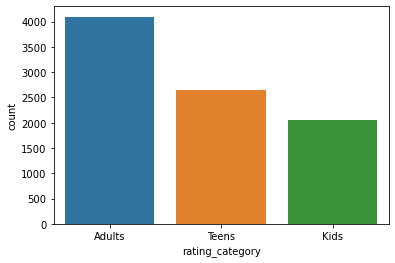

In [39]:
sns.countplot(data=data, x='rating_category', order = data['rating_category'].value_counts().index)

<AxesSubplot:>

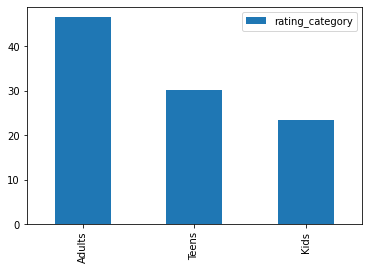

In [40]:
(data['rating_category'].value_counts(normalize=True) * 100).to_frame().plot.bar()

In [41]:
(data['rating_category'].value_counts(normalize=True) * 100)

Adults    46.508459
Teens     30.123765
Kids      23.367776
Name: rating_category, dtype: float64

About 23% of shows on Netflix are for Children, (30+23)% to Teenagers, and (47+30+23)% to Adults.

Text(0, 0.5, 'Number of Movie/TV Shows')

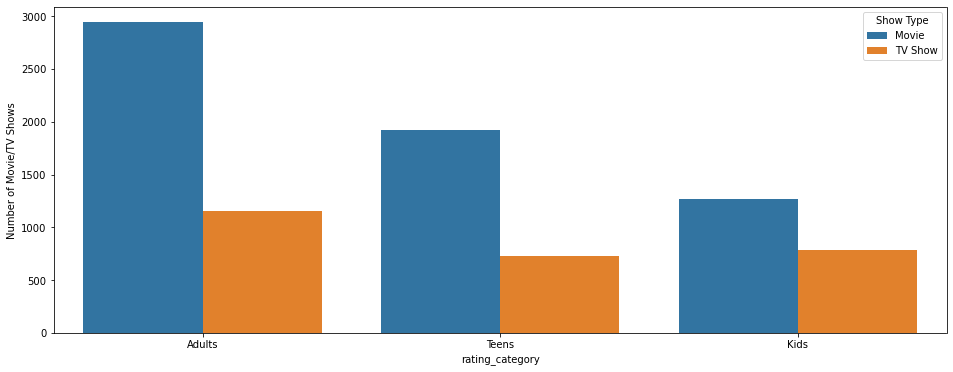

In [42]:
fig, ax = plt.subplots(figsize=(16,6))
sns.countplot(data=data, x='rating_category', hue='type', order = data['rating_category'].value_counts().index)
ax.legend(title='Show Type')
ax.set_ylabel('Number of Movie/TV Shows')

In [43]:
data.groupby(['rating_category','type']).type.agg(len)

rating_category  type   
Adults           Movie      2942
                 TV Show    1154
Kids             Movie      1269
                 TV Show     789
Teens            Movie      1920
                 TV Show     733
Name: type, dtype: int64

In [44]:
data['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

In [45]:
round((data.loc[:,['rating_category','type']].value_counts()[0:3] / data['type'].value_counts()[0]) * 100,2)

rating_category  type 
Adults           Movie    47.99
Teens            Movie    31.32
Kids             Movie    20.70
dtype: float64

In [46]:
round((data.loc[:,['rating_category','type']].value_counts()[3:] / data['type'].value_counts()[1]) * 100,2)

rating_category  type   
Adults           TV Show    43.12
Kids             TV Show    29.48
Teens            TV Show    27.39
dtype: float64

Adult Movies are 48% of all movies in Netflix, followed by 31% being Teenager movies, and lastly 21% being Children movies.  
Adult TV Shows are 43% of all TV shows in Netflix, followed by 29% being Teenager TV shows, and lastly 27% being Children TV shows.

### Netflix genres

In [47]:
data['listed_in'].to_list()

['Documentaries',
 'International TV Shows, TV Dramas, TV Mysteries',
 'Crime TV Shows, International TV Shows, TV Action & Adventure',
 'Docuseries, Reality TV',
 'International TV Shows, Romantic TV Shows, TV Comedies',
 'TV Dramas, TV Horror, TV Mysteries',
 'Children & Family Movies',
 'Dramas, Independent Movies, International Movies',
 'British TV Shows, Reality TV',
 'Comedies, Dramas',
 'Crime TV Shows, Docuseries, International TV Shows',
 'Crime TV Shows, International TV Shows, TV Action & Adventure',
 'Dramas, International Movies',
 'Children & Family Movies, Comedies',
 'British TV Shows, Crime TV Shows, Docuseries',
 'TV Comedies, TV Dramas',
 'Documentaries, International Movies',
 'Crime TV Shows, Spanish-Language TV Shows, TV Dramas',
 'Thrillers',
 'International TV Shows, Spanish-Language TV Shows, TV Action & Adventure',
 'Crime TV Shows, Docuseries, International TV Shows',
 'International TV Shows, TV Action & Adventure, TV Dramas',
 'Comedies, International Movi

genres are comma seperated. check for spelling errors / whitespaces

In [48]:
', '.join(data['listed_in']).split(', ')

['Documentaries',
 'International TV Shows',
 'TV Dramas',
 'TV Mysteries',
 'Crime TV Shows',
 'International TV Shows',
 'TV Action & Adventure',
 'Docuseries',
 'Reality TV',
 'International TV Shows',
 'Romantic TV Shows',
 'TV Comedies',
 'TV Dramas',
 'TV Horror',
 'TV Mysteries',
 'Children & Family Movies',
 'Dramas',
 'Independent Movies',
 'International Movies',
 'British TV Shows',
 'Reality TV',
 'Comedies',
 'Dramas',
 'Crime TV Shows',
 'Docuseries',
 'International TV Shows',
 'Crime TV Shows',
 'International TV Shows',
 'TV Action & Adventure',
 'Dramas',
 'International Movies',
 'Children & Family Movies',
 'Comedies',
 'British TV Shows',
 'Crime TV Shows',
 'Docuseries',
 'TV Comedies',
 'TV Dramas',
 'Documentaries',
 'International Movies',
 'Crime TV Shows',
 'Spanish-Language TV Shows',
 'TV Dramas',
 'Thrillers',
 'International TV Shows',
 'Spanish-Language TV Shows',
 'TV Action & Adventure',
 'Crime TV Shows',
 'Docuseries',
 'International TV Shows',
 'In

In [49]:
unique_genres = np.unique(', '.join(data['listed_in']).split(', '))

In [50]:
unique_genres

array(['Action & Adventure', 'Anime Features', 'Anime Series',
       'British TV Shows', 'Children & Family Movies',
       'Classic & Cult TV', 'Classic Movies', 'Comedies',
       'Crime TV Shows', 'Cult Movies', 'Documentaries', 'Docuseries',
       'Dramas', 'Faith & Spirituality', 'Horror Movies',
       'Independent Movies', 'International Movies',
       'International TV Shows', "Kids' TV", 'Korean TV Shows',
       'LGBTQ Movies', 'Movies', 'Music & Musicals', 'Reality TV',
       'Romantic Movies', 'Romantic TV Shows', 'Sci-Fi & Fantasy',
       'Science & Nature TV', 'Spanish-Language TV Shows',
       'Sports Movies', 'Stand-Up Comedy', 'Stand-Up Comedy & Talk Shows',
       'TV Action & Adventure', 'TV Comedies', 'TV Dramas', 'TV Horror',
       'TV Mysteries', 'TV Sci-Fi & Fantasy', 'TV Shows', 'TV Thrillers',
       'Teen TV Shows', 'Thrillers'], dtype='<U28')

No spelling errors or whitespaces. There are overlapping genres, i.e. ('Movies', 'Horror Movies') but this is how Netflix has classified them so we will leave it be

In [51]:
data2 = data.reindex(data.columns.to_list() + unique_genres.tolist(), axis=1, fill_value=0)

In [52]:
for index, row in data2.iterrows():
    for val in row.listed_in.split(', '):
        data2.loc[index, val] = 1

In [53]:
genres = data2.iloc[:,17:].sum().sort_values(ascending=False)

Text(0.5, 0, 'Number of Movies/TV Shows')

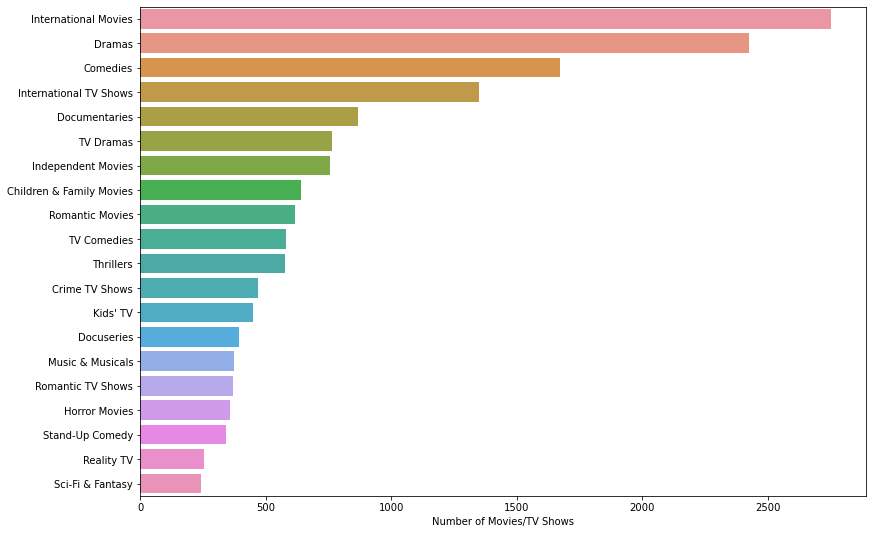

In [54]:
fig, ax = plt.subplots(figsize=(13,9))
sns.barplot(x=genres[:20], y=genres.index[:20])
ax.set_xlabel("Number of Movies/TV Shows")

International content, Dramas and Comedies are the most popular genres of content on Netflix.  
It appears Movies and TV Shows have their own respective genres, i.e Romantic Movies, Romantic TV Shows, so I will be exploring them by their show type

In [55]:
data['type'].value_counts(normalize=True)

Movie      0.696151
TV Show    0.303849
Name: type, dtype: float64

In [56]:
round((data.loc[:,['rating_category','type']].value_counts()[0:3] / data['type'].value_counts()[0]) * 100,2)

rating_category  type 
Adults           Movie    47.99
Teens            Movie    31.32
Kids             Movie    20.70
dtype: float64

In [57]:
round((data.loc[:,['rating_category','type']].value_counts()[3:] / data['type'].value_counts()[1]) * 100,2)

rating_category  type   
Adults           TV Show    43.12
Kids             TV Show    29.48
Teens            TV Show    27.39
dtype: float64

TV Shows have a higher weightage in the Kids rating_category as compared to Movies. Perhaps Netflix believes TV Shows appeal more to kids as compared to movies.   

But since genres can overlap for a single TV show/Movie, we should look at the genre numbers against the total number of TV shows/movies for a more accurate representation of the genre distribution

### Children rating vs Genre

In [58]:
data2.loc[data2['rating_category'] == 'Kids',['type']].value_counts()

type   
Movie      1269
TV Show     789
dtype: int64

In [59]:
kidgenresTVShows = data2.iloc[:,13:][(data2['rating_category'] == 'Kids') & (data2['type'] == 'TV Show')].sum().sort_values(ascending=False) #/ 2533 * 100

In [60]:
total_shows_kids = pd.Series([data.loc[data2['rating_category'] == 'Kids',['type']].value_counts()[1]], index=['Total Kid TV Shows'])

In [61]:
kidgenresTVShows2 = total_shows_kids.append(kidgenresTVShows)

Top 15 Genres for TV Shows under the Kids rating_category

Text(0.5, 0, 'Number of TV Shows')

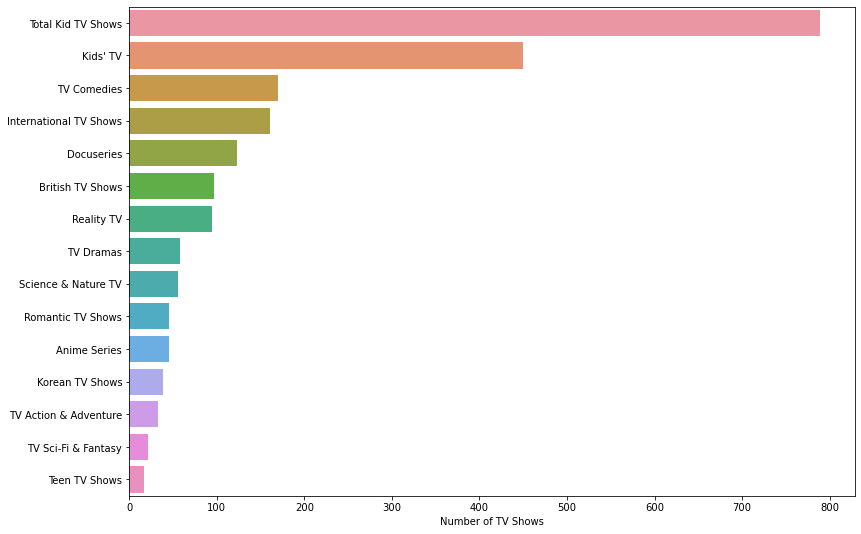

In [62]:
fig, ax = plt.subplots(figsize=(13,9))
sns.barplot(x=kidgenresTVShows2[:15], y=kidgenresTVShows2.index[:15])
ax.set_xlabel("Number of TV Shows")

In [63]:
data2["Kids' TV"].sum() / 789 #57.16% of rating_category = 'Kids' TV Shows are of the Kids' TV genre

0.5716096324461344

About 57% of TV Shows with rating_category: "Kids" are of the **Kids' TV** genre.   
TV Comedies, International TV Shows, Docuseries follow after with only about half as many shows as the Kids' TV genre.  

These may not be genres that have a high appeal factor to children although they have been categorically rated as "Kids" TV Shows in the rating_category column. It could just mean that it is safe for Children to watch.  

However, as the genres are rather generic sounding, it is hard to ascertain that they definitely do not appeal to children, e.g. "International TV Shows" could also refer to a highly rated/popular children's show in another country.  

Under the assumption that these shows rated "Children" solely mean that they are safe for children to watch, only 57% of 789 TV Shows are meant to appeal to Netflix children audiences, which is not a very wide variety of shows.

In [64]:
kidgenresMovies = data2.iloc[:,13:][(data2['rating_category'] == 'Kids') & (data2['type'] == 'Movie')].sum().sort_values(ascending=False) #/ 2533 * 100
total_movies_kids = pd.Series([data.loc[data2['rating_category'] == 'Kids',['type']].value_counts()[0]], index=['Total Kid Movies'])
kidgenresMovies2 = total_movies_kids.append(kidgenresMovies)

Top 15 Genres for Movies under the Kids rating_category

Text(0.5, 0, 'Number of Movies')

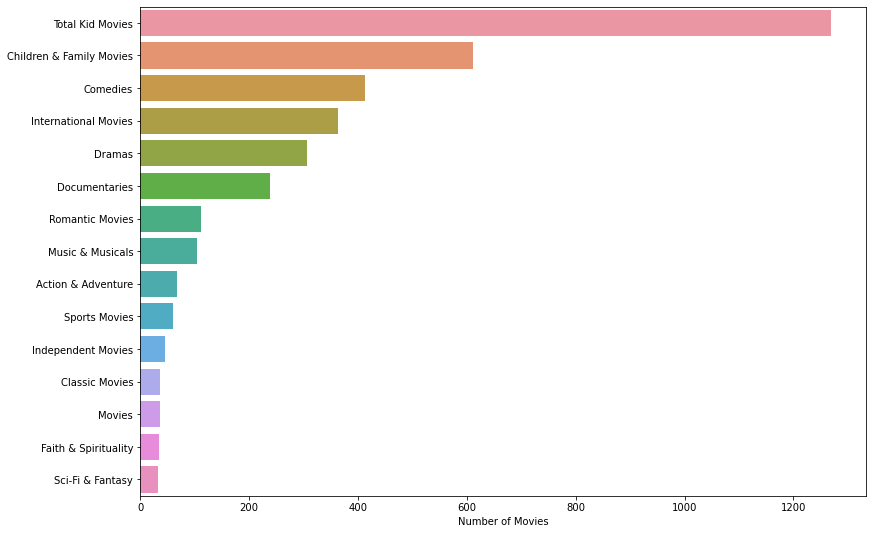

In [65]:
fig, ax = plt.subplots(figsize=(13,9))
sns.barplot(x=kidgenresMovies2[:15], y=kidgenresMovies2.index[:15])
ax.set_xlabel("Number of Movies")

In [66]:
data2['Children & Family Movies'].sum() / 1269 #50.5% of rating_category = 'Kids' Movies are of the Children & Family Movies genre

0.5051221434200157

In [67]:
data2['type'][data2['rating_category'] == 'Kids'].value_counts()

Movie      1269
TV Show     789
Name: type, dtype: int64

In [68]:
data2['type'].value_counts().sum() #total netflix content

8807

In [69]:
((1269/100) * 50.5) + ((789 / 100) * 57.16) #movies * 50.5% + tv shows * 57.16%

1091.8374

About 50% of movies with rating_category = 'Kids' are of the **Children & Family Movies** genre.  
This means about 50-57% of tv shows/movies under rating_category = 'Kids' are definitively meant to appeal to Children viewers. 


This number would amount to:  
(1269 x 50%)Movies + (789 x 57%)TV Shows = 1092~ netflix children content.  
Out of 8807 total netflix content, 12.39% is truly targeted at children.

### Teen rating vs Genre

In [70]:
data2['type'][data['rating_category'] == 'Teens'].value_counts()

Movie      1920
TV Show     733
Name: type, dtype: int64

In [71]:
teensgenresTVShows = data2.iloc[:,13:][(data2['rating_category'] == 'Teens') & (data2['type'] == 'TV Show')].sum().sort_values(ascending=False)
total_shows_teens = pd.Series([data.loc[data2['rating_category'] == 'Teens',['type']].value_counts()[1]], index=['Total Teen TV Shows'])
teensgenresTVShows2 = total_shows_teens.append(teensgenresTVShows)

Top 15 Genres for TV Shows under the Teens rating_category

Text(0.5, 0, 'Number of TV Shows')

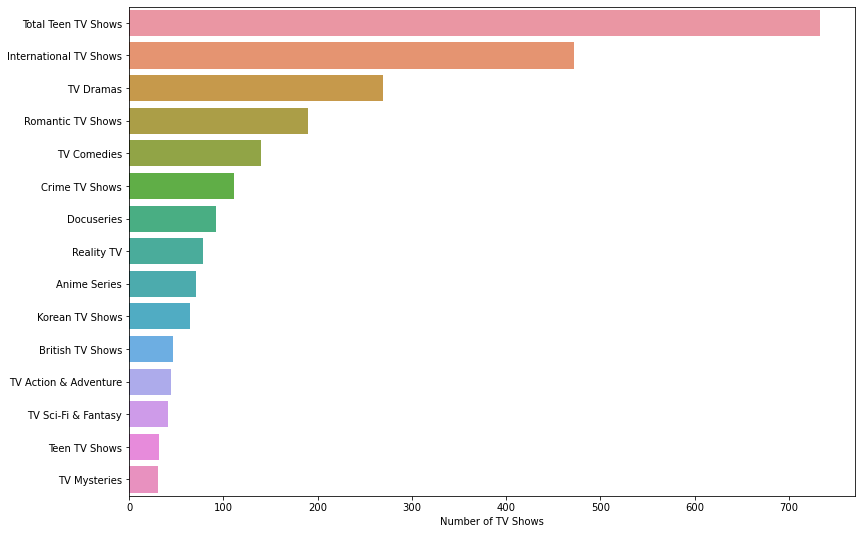

In [72]:
fig, ax = plt.subplots(figsize=(13,9))
sns.barplot(x=teensgenresTVShows2[:15], y=teensgenresTVShows2.index[:15])
ax.set_xlabel("Number of TV Shows")

In [73]:
teensgenresMovies = data2.iloc[:,13:][(data2['rating_category'] == 'Teens') & (data2['type'] == 'Movie')].sum().sort_values(ascending=False)
total_movies_teens = pd.Series([data.loc[data2['rating_category'] == 'Teens',['type']].value_counts()[0]], index=['Total Teen Movies'])
teensgenresMovies2 = total_movies_teens.append(teensgenresMovies)

Top 15 Genres for Movies under the Teens rating_category

Text(0.5, 0, 'Number of Movies')

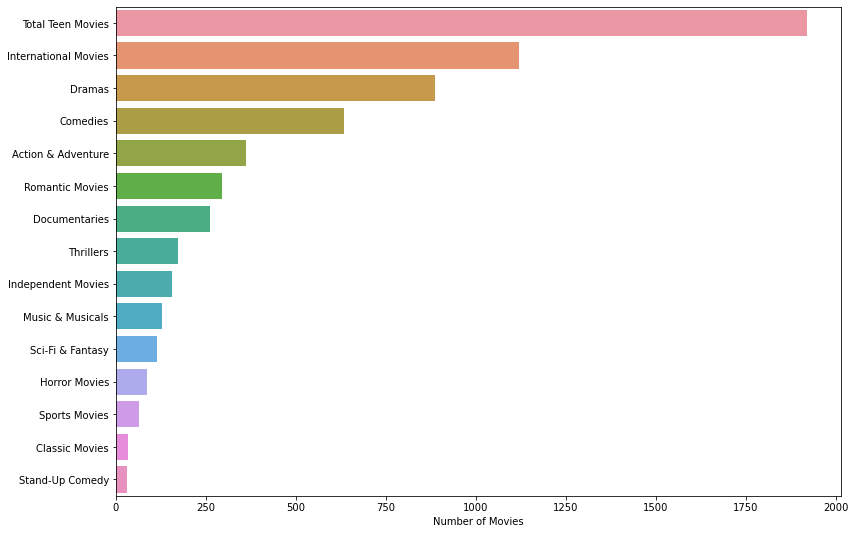

In [74]:
fig, ax = plt.subplots(figsize=(13,9))
sns.barplot(x=teensgenresMovies2[:15], y=teensgenresMovies2.index[:15])
ax.set_xlabel("Number of Movies")

Content under rating_category = Teens are quite similar across TV Shows and Movies. Dramas, Comedies, and Romance are among the top genres.  

Interestingly, the 'Teen TV Shows' genres is not very high ranked for rating_category = Teens.  
Apart from losing out to the more common genres, it is also ranked below Anime Series and Korean TV Shows genres.

Dramas are the most popular in both TV Shows and Movies.  
Romance is more common in TV Shows as compared to Movies.  
Action & Adventure is significantly more common in Movies as compared to TV Shows.

### Adult rating vs Genre

In [75]:
data2['type'][data['rating_category'] == 'Adults'].value_counts()

Movie      2942
TV Show    1154
Name: type, dtype: int64

In [76]:
adultsgenresTVShows = data2.iloc[:,13:][(data2['rating_category'] == 'Adults') & (data2['type'] == 'TV Show')].sum().sort_values(ascending=False)
total_shows_adults = pd.Series([data.loc[data2['rating_category'] == 'Adults',['type']].value_counts()[1]], index=['Total Adult TV Shows'])
adultsgenresTVShows2 = total_shows_adults.append(adultsgenresTVShows)

Top 15 Genres for TV Shows under the Adults rating_category

Text(0.5, 0, 'Number of TV Shows')

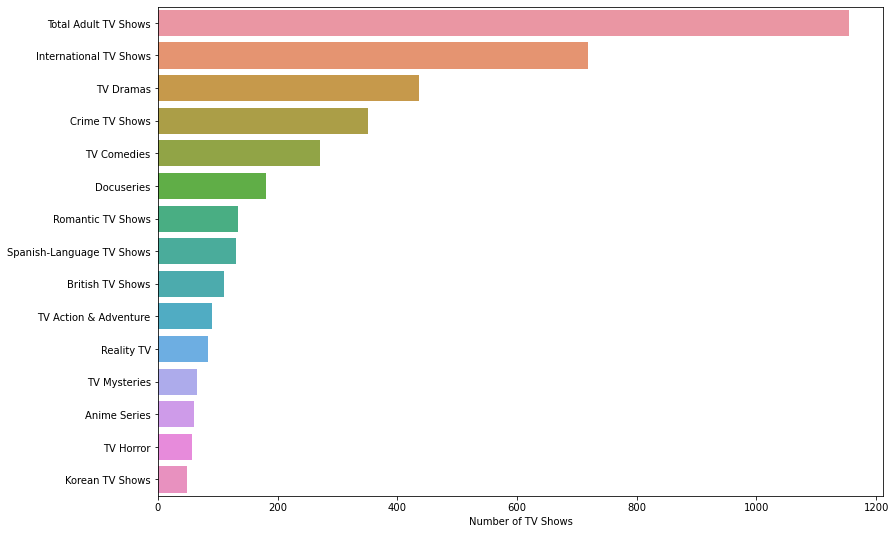

In [77]:
fig, ax = plt.subplots(figsize=(13,9))
sns.barplot(x=adultsgenresTVShows2[:15], y=adultsgenresTVShows2.index[:15])
ax.set_xlabel("Number of TV Shows")

In [78]:
adultsgenresMovies = data2.iloc[:,13:][(data2['rating_category'] == 'Adults') & (data2['type'] == 'Movie')].sum().sort_values(ascending=False)
total_movies_adults = pd.Series([data.loc[data2['rating_category'] == 'Adults',['type']].value_counts()[0]], index=['Total Adult Movies'])
adultsgenresMovies2 = total_movies_adults.append(adultsgenresMovies)

Top 15 Genres for Movies under the Adults rating_category

Text(0.5, 0, 'Number of Movies')

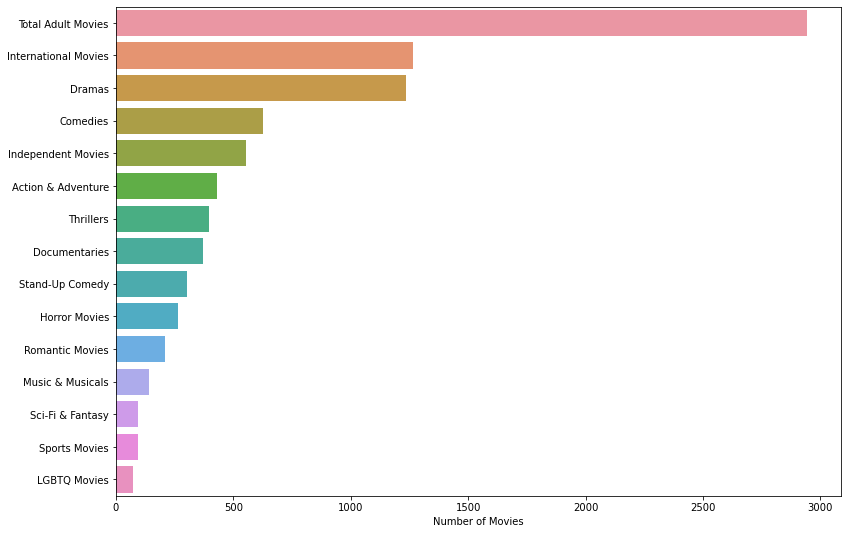

In [79]:
fig, ax = plt.subplots(figsize=(13,9))
sns.barplot(x=adultsgenresMovies2[:15], y=adultsgenresMovies2.index[:15])
ax.set_xlabel("Number of Movies")

In [80]:
data2['type'][data2['rating_category'] == 'Adults'].value_counts()

Movie      2942
TV Show    1154
Name: type, dtype: int64

Content under rating_category = Adults have Dramas and Comedies as the top genres. The Romance genre fell significantly in the rankings as compared to content from rating_category = Teens.

Dramas are the most popular in both TV Shows and Movies.  
Crime TV Shows are significantly more common in TV Shows as compared to Movies.
Action & Adventure is significantly more common in Movies as compared to TV Shows.

Comedies and Dramas are the most popular genres across all 3 rating_category. Movies are similar between Adults and Teens in genre rankings, while for TV shows, Adults lean towards the Crime genre and Teens towards the Romance genre.

### Alternative methods to counting genres
### Counter method

In [81]:
#simpler way to count genres if we don't need to add it to the dataframe(longer execution time) for comparing with other features.
netflix_genres = ", ".join(data['listed_in']).split(", ")

genre_cnt = Counter()
for genre in netflix_genres:
    genre_cnt[genre] += 1

top_20_genre = genre_cnt.most_common(20)
netflix_genres = pd.DataFrame (top_20_genre, columns = ['Genres','Genres Count'])
netflix_genres.head()

,Genres,Genres Count
0,International Movies,2752
1,Dramas,2427
2,Comedies,1674
3,International TV Shows,1351
4,Documentaries,869


### Melt method

In [82]:
data3 = data.copy()

In [83]:
genres2 = data3['listed_in'].str.split(', ')
max([len(genre) for genre in genres2]) #max number of genres per row of data

3

In [84]:
genres2 = data3['listed_in'].str.split(', ', expand=True)

In [85]:
data3 = pd.concat([data3, genres2], axis=1)

In [ ]:
data3 = data3.melt(id_vars = ["type"], value_vars = [0,1,2], value_name = "listed_in")

In [87]:
data3 = data3[~data3['listed_in'].isnull()]

### Date analyses

In [88]:
round((data.isnull().sum()/data.shape[0]) * 100,3).sort_values(ascending=False).head(5)

director      29.908
country        9.436
cast           9.368
date_added     0.114
show_id        0.000
dtype: float64

In [89]:
data[data.date_added.isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,rating_category
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ...",Adults
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,NaN,Anthony Bourdain,United States,NaN,2018,TV-PG,5,Docuseries,This CNN original series has chef Anthony Bour...,Kids
6795,s6796,TV Show,Frasier,NaN,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaN,2003,TV-PG,11,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...,Kids
6806,s6807,TV Show,Friends,NaN,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaN,2003,TV-14,10,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...,Teens
6901,s6902,TV Show,Gunslinger Girl,NaN,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaN,2008,TV-14,2,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe...",Teens
7196,s7197,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,NaN,2010,TV-Y,2,Kids' TV,A wacky rabbit and his gang of animal pals hav...,Kids
7254,s7255,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaN,2012,TV-14,3,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder...",Teens
7406,s7407,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4,TV Comedies,"Marc Maron stars as Marc Maron, who interviews...",Adults
7847,s7848,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil...",Adults
8182,s8183,TV Show,The Adventures of Figaro Pho,NaN,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaN,2015,TV-Y7,2,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ...",Kids


In [90]:
data.date_added.value_counts().index.to_list()

['January 1, 2020',
 'November 1, 2019',
 'March 1, 2018',
 'December 31, 2019',
 'October 1, 2018',
 'October 1, 2019',
 'July 1, 2021',
 'November 1, 2018',
 'September 1, 2021',
 'July 1, 2019',
 'January 1, 2018',
 'June 2, 2021',
 'January 1, 2021',
 'October 1, 2017',
 'April 1, 2018',
 'April 1, 2020',
 'May 1, 2018',
 'July 1, 2018',
 'August 1, 2017',
 'July 6, 2021',
 'February 1, 2019',
 'July 1, 2017',
 'August 1, 2021',
 'September 1, 2017',
 'August 1, 2018',
 'January 1, 2019',
 'October 1, 2020',
 'May 1, 2021',
 'November 1, 2020',
 'January 1, 2016',
 'April 1, 2021',
 'June 1, 2017',
 'September 1, 2019',
 'November 20, 2019',
 'March 1, 2019',
 'November 1, 2017',
 'March 31, 2017',
 'July 5, 2020',
 'December 15, 2019',
 'December 1, 2020',
 'December 1, 2018',
 'April 1, 2019',
 'August 27, 2021',
 'April 1, 2017',
 'December 31, 2018',
 'December 1, 2017',
 'August 1, 2019',
 'September 1, 2020',
 'December 1, 2019',
 'July 22, 2021',
 'May 1, 2017',
 'August 2, 

date_added format looks consistent throughout, apart from some dates having a whitespace in front, e.g. " January 1, 2018"

In [91]:
data.date_added = data.date_added.str.strip()

In [92]:
data.date_added = pd.to_datetime(data.date_added, format= "%B %d, %Y")

In [93]:
data['Year'] = data['date_added'].map(lambda x: x.year)
data['Month'] = data['date_added'].map(lambda x: x.month)
data['Day'] = data['date_added'].map(lambda x: x.day)
data['day_of_week'] = data['date_added'][~data['date_added'].isnull()].map(lambda x: x.strftime('%A'))

In [94]:
data['Year'] = data['Year'].astype('Int64')
data['Month'] = data['Month'].astype('Int64')
data['Day'] = data['Day'].astype('Int64')

### Yearly Content Additions

In [95]:
year = data['Year'].value_counts()
yearIndex = data['Year'].value_counts().index
yearNorm = data['Year'].value_counts(normalize=True)*100

Text(0.5, 0, 'Year')

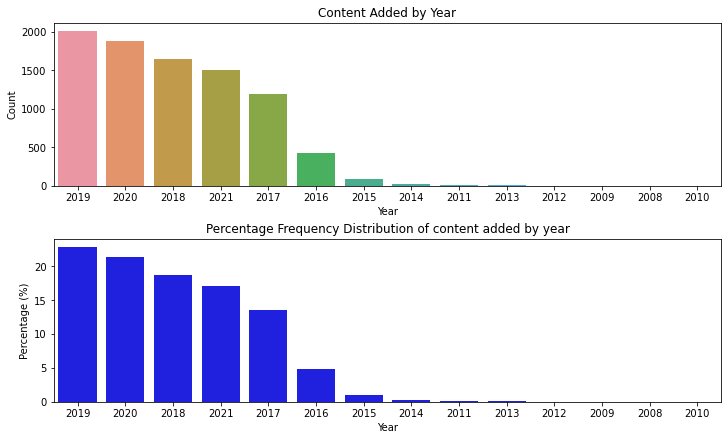

In [96]:
fig, ax = plt.subplots(2,1, figsize=(10,6), constrained_layout=True)
sns.barplot(x=yearIndex, y=year, order = data['Year'].value_counts().index, ax=ax[0])
ax[0].set_title("Content Added by Year")
ax[0].set_ylabel("Count")
ax[0].set_xlabel("Year")
sns.barplot(x=yearIndex, y=yearNorm, order = data['Year'].value_counts().index, color='blue', ax=ax[1])
ax[1].set_title("Percentage Frequency Distribution of content added by year")
ax[1].set_ylabel("Percentage (%)")
ax[1].set_xlabel("Year")

Netflix started ramping up their content addition since 2016. Lets see how "up to date" do they keep with new additions

In [97]:
(data['Year'][data['Year'] > 2016] - data['release_year'][data['Year'] > 2016]).value_counts().sort_index()

-1       11
 0     2975
 1     1472
 2      683
 3      475
       ... 
 73       3
 74       3
 75       2
 76       1
 93       1
Length: 73, dtype: Int64

In [98]:
(data['Year'] - data['release_year']).value_counts().index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 11, 10, 12, 13, 14, 16, 15,
            18, 17, 21, 20, 22, 19, 24, 23, 25, 27, 26, 29, 37, 28, 30, 38, 40,
            35, -1, 34, 33, 39, 31, 43, 41, 46, 32, 36, 45, 44, 49, 57, 54, 51,
            47, 74, 42, 73, 59, 72, 52, 62, 50, 66, 64, 61, 71, 75, 65, 48, 55,
            76, -3, -2, 93, 60, 70, 63],
           dtype='int64')

Some negative values in the index indicate dirty data because date_added cant be before the release_year.  
Replace year for respective date_added values to be = release_year.

In [99]:
data[['date_added','release_year']][data['Year'] - data['release_year'] == -3]

,date_added,release_year
7112,2013-03-31,2016


In [ ]:
data['date_added'][data['Year'] - data['release_year'] == -3] += pd.offsets.DateOffset(years=3)

In [ ]:
data['date_added'][data['Year'] - data['release_year'] == -2] += pd.offsets.DateOffset(years=2)

In [ ]:
data['date_added'][data['Year'] - data['release_year'] == -1] += pd.offsets.DateOffset(years=1)

Update Year column for rows where date_added was rectified.

In [103]:
storeIndex = data[['date_added','Year']][data['Year'] - data['release_year'] < 0].index
data[['date_added','Year']][data['Year'] - data['release_year'] < 0]

,date_added,Year
1551,2021-12-14,2020
1696,2021-11-15,2020
2920,2021-02-13,2020
3168,2020-12-06,2019
3287,2020-11-13,2019
3369,2020-10-25,2019
3433,2020-10-11,2019
4844,2019-05-30,2018
4845,2019-05-29,2018
5394,2018-07-01,2017


In [104]:
data['Year'] = data['date_added'].map(lambda x: x.year)
data['Year'] = data['Year'].astype('Int64')

In [105]:
#data.iloc[storeIndex,[6,7,12]]
data.loc[storeIndex,['date_added','release_year']]

,date_added,release_year
1551,2021-12-14,2021
1696,2021-11-15,2021
2920,2021-02-13,2021
3168,2020-12-06,2020
3287,2020-11-13,2020
3369,2020-10-25,2020
3433,2020-10-11,2020
4844,2019-05-30,2019
4845,2019-05-29,2019
5394,2018-07-01,2018


Visualize how "up to date" Netflix is with their content by looking at the time difference in the show's release_year and date_added

In [106]:
release_to_date_added = (data['Year'][data['Year'] > 2016] - data['release_year'][data['Year'] > 2016]).value_counts()[:10]
release_to_date_added_norm = ((data['Year'][data['Year'] > 2016] - data['release_year'][data['Year'] > 2016]).value_counts(normalize=True)*100)[:10]

Text(0, 0.5, 'Percentage (%)')

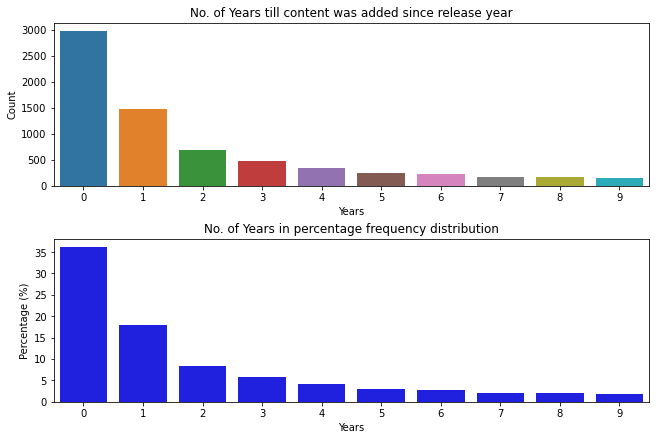

In [107]:
fig, ax = plt.subplots(2,1,figsize=(9,6), constrained_layout=True)
sns.barplot(x=release_to_date_added.index, y=release_to_date_added, ax=ax[0])
sns.barplot(x=release_to_date_added_norm.index, y=release_to_date_added_norm, color='b', ax=ax[1])
ax[0].set_title('No. of Years till content was added since release year')
ax[0].set_xlabel('Years')
ax[0].set_ylabel('Count')
ax[1].set_title('No. of Years in percentage frequency distribution')
ax[1].set_xlabel('Years')
ax[1].set_ylabel('Percentage (%)')

In [108]:
release_to_date_added_norm

0    36.297376
1    17.881438
2      8.29689
3     5.770165
4     4.069485
5     3.000486
6     2.866861
7     2.162293
8      2.12585
9     1.907191
dtype: Float64

Netflix adds newly released content within the content's year of release. This is a good sign that Netflix keeps up to date with new films/tv show releases.

How about older films/tv shows?

In [109]:
data.loc[data['release_year'] < 2000,['title','type','date_added','release_year']]

,title,type,date_added,release_year
7,Sankofa,Movie,2021-09-24,1993
22,Avvai Shanmughi,Movie,2021-09-21,1996
24,Jeans,Movie,2021-09-21,1998
26,Minsara Kanavu,Movie,2021-09-21,1997
41,Jaws,Movie,2021-09-16,1975
...,...,...,...,...
8745,Willy Wonka & the Chocolate Factory,Movie,2020-01-01,1971
8748,Winter of Our Dreams,Movie,2016-11-01,1981
8763,WWII: Report from the Aleutians,Movie,2017-03-31,1943
8764,Wyatt Earp,Movie,2020-01-01,1994


Netflix also keeps a portion of old titles on their platform, which I assume to be old classics, such as 'Jaws', 'Willy Wonka & the Chocolate Factory'.

### Monthly Content Additions

In [110]:
month = data['Month'].value_counts()
monthIndex = data['Month'].value_counts().index
monthNorm = data['Month'].value_counts(normalize=True)*100

Text(0.5, 0, 'Months')

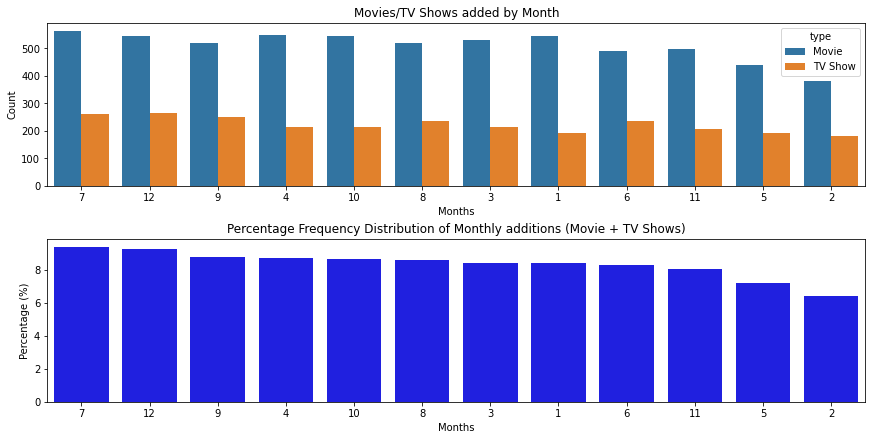

In [111]:
fig, ax = plt.subplots(2,1, figsize=(12,6), constrained_layout=True)
sns.countplot(data=data, x='Month', hue='type', order = data['Month'].value_counts().index, ax=ax[0])
ax[0].set_title("Movies/TV Shows added by Month")
ax[0].set_ylabel("Count")
ax[0].set_xlabel("Months")
sns.barplot(x=monthIndex, y=monthNorm, order = data['Month'].value_counts().index, color='blue', ax=ax[1])
ax[1].set_title("Percentage Frequency Distribution of Monthly additions (Movie + TV Shows)")
ax[1].set_ylabel("Percentage (%)")
ax[1].set_xlabel("Months")

Addition of content is fairly consistent across the months, with the most number of content additions being in July and December, with July having slightly more Movies than TV shows and vice versa for December.  
February and May have the least number of additions with February having about 30% less additions compared to July.

The lower numbers in May and February are unusual. Check if data is added monthly:

<AxesSubplot:xlabel='Year', ylabel='Month'>

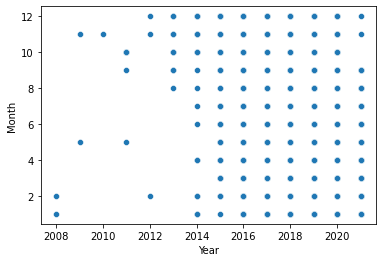

In [112]:
sns.scatterplot(x=data['Year'], y=data['Month'])

We know that the majority of additions are from after 2016. Every month since 2016 has had content additions apart from October 2021.

In [113]:
data['Month'][data['Year'] == 2021].value_counts()

7     257
6     207
4     188
9     183
8     178
5     132
1     132
3     112
2     110
12      1
11      1
Name: Month, dtype: Int64

The dataset could have been created somewhere in October 2021, with the singular additions in November and December of 2021 being dirty data.  

Perhaps the lower number of additions in February and May are due to trough working periods.

### Daily Content Additions

In [114]:
days = data['Day'].value_counts()
dayIndex = data['Day'].value_counts().index
dayNorm = data['Day'].value_counts(normalize=True)*100

Text(0.5, 0, 'Days')

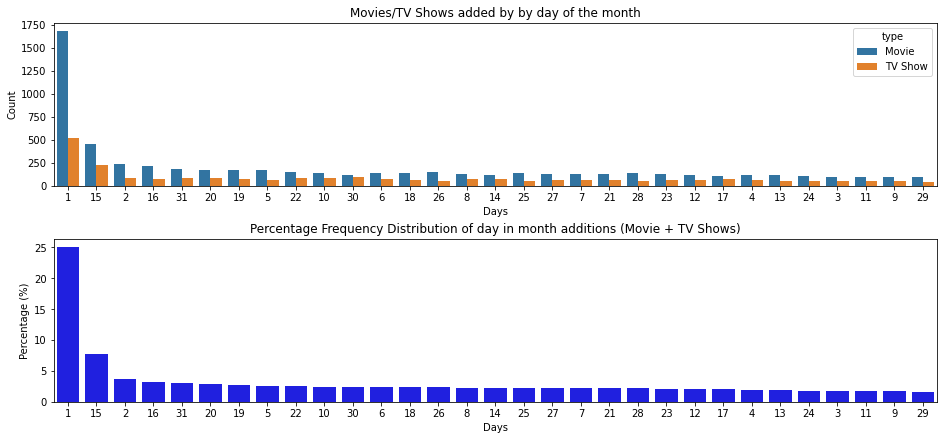

In [115]:
fig, ax = plt.subplots(2,1, figsize=(13,6), constrained_layout=True)
sns.countplot(data=data, x='Day', hue='type', order = data['Day'].value_counts().index, ax=ax[0])
ax[0].set_title("Movies/TV Shows added by by day of the month")
ax[0].set_ylabel("Count")
ax[0].set_xlabel("Days")
sns.barplot(x=dayIndex, y=dayNorm, order = data['Day'].value_counts().index, color='blue', ax=ax[1])
ax[1].set_title("Percentage Frequency Distribution of day in month additions (Movie + TV Shows)")
ax[1].set_ylabel("Percentage (%)")
ax[1].set_xlabel("Days")

Day of Month additions are highest on the 1st and 15th day of each month.  

If we added up the content additions on 31st and 30th, (for last day of month less February) we would have the last day of the month at the 3rd highest rank in the percentage frequency.  

Seeing how close days 2 and 16 are to the top ranks compared to the rest of the other days, we should also be able to roughly guess that Netflix has a buffer period of 1 day for adding content on the major content addition days. (first,middle,end of month +/- 1 day)

### Day of the week / Weekdays/Weekends Content Additions

In [116]:
day_of_week = data['day_of_week'].value_counts()
day_of_week_index = data['day_of_week'].value_counts().index
day_norm = data['day_of_week'].value_counts(normalize=True)*100

In [117]:
day_of_week

Friday       2498
Thursday     1396
Wednesday    1288
Tuesday      1197
Monday        851
Saturday      816
Sunday        751
Name: day_of_week, dtype: int64

In [118]:
day_norm

Friday       28.396044
Thursday     15.869046
Wednesday    14.641355
Tuesday      13.606911
Monday        9.673752
Saturday      9.275890
Sunday        8.537001
Name: day_of_week, dtype: float64

Text(0.5, 0, 'Day')

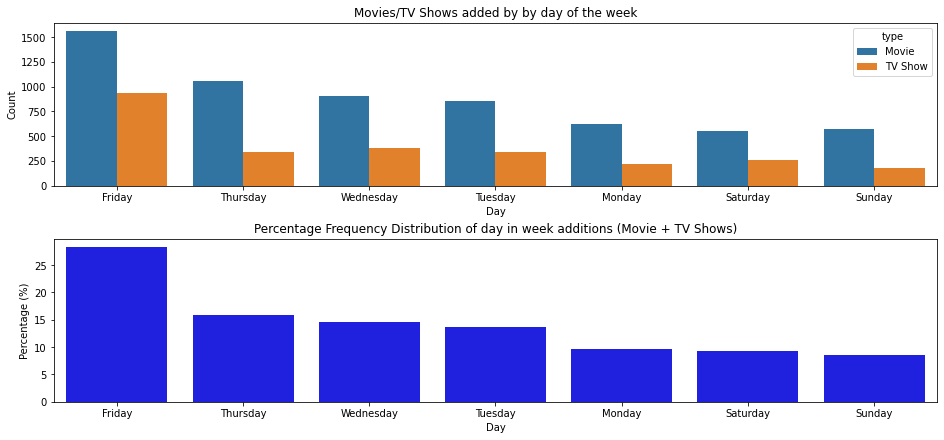

In [119]:
fig, ax = plt.subplots(2,1, figsize=(13,6), constrained_layout=True)
sns.countplot(data=data, x='day_of_week', hue='type', order = data['day_of_week'].value_counts().index, ax=ax[0])
ax[0].set_title("Movies/TV Shows added by by day of the week")
ax[0].set_ylabel("Count")
ax[0].set_xlabel("Day")
sns.barplot(x=day_of_week_index, y=day_norm, order = data['day_of_week'].value_counts().index, color='blue', ax=ax[1])
ax[1].set_title("Percentage Frequency Distribution of day in week additions (Movie + TV Shows)")
ax[1].set_ylabel("Percentage (%)")
ax[1].set_xlabel("Day")

Content Additions occur the most on Friday and the least on the Weekends (Saturday and Sunday) and the first day of the week. (Monday)

### Director/Cast

In [120]:
data['director'].value_counts().index.to_list()

['Rajiv Chilaka',
 'Raúl Campos, Jan Suter',
 'Marcus Raboy',
 'Suhas Kadav',
 'Jay Karas',
 'Cathy Garcia-Molina',
 'Martin Scorsese',
 'Youssef Chahine',
 'Jay Chapman',
 'Steven Spielberg',
 'Don Michael Paul',
 'David Dhawan',
 'Yılmaz Erdoğan',
 'Lance Bangs',
 'Kunle Afolayan',
 'Quentin Tarantino',
 'Ryan Polito',
 'Troy Miller',
 'Shannon Hartman',
 'Fernando Ayllón',
 'Robert Rodriguez',
 'Hakan Algül',
 'Johnnie To',
 'Ozan Açıktan',
 'Justin G. Dyck',
 'Omoni Oboli',
 'Clint Eastwood',
 'S.S. Rajamouli',
 'Hidenori Inoue',
 'Mae Czarina Cruz',
 'Ram Gopal Varma',
 'Prakash Satam',
 'McG',
 'Toshiya Shinohara',
 'Ron Howard',
 'Joey So',
 'Robert Vince',
 'Lasse Hallström',
 'Imtiaz Ali',
 'Steven Soderbergh',
 'David Fincher',
 'Matt Askem',
 'Anees Bazmee',
 'Ashutosh Gowariker',
 'Hanung Bramantyo',
 'Rajkumar Santoshi',
 'Noah Baumbach',
 'Vlad Yudin',
 'Robert Luketic',
 'Sameh Abdulaziz',
 'Milan Luthria',
 'Wenn V. Deramas',
 'Sooraj R. Barjatya',
 'Wilson Yip',
 'Andy

multiple directors per show in some rows

In [121]:
data['director'].str.split(',')

0       [Kirsten Johnson]
1                     NaN
2       [Julien Leclercq]
3                     NaN
4                     NaN
              ...        
8802      [David Fincher]
8803                  NaN
8804    [Ruben Fleischer]
8805       [Peter Hewitt]
8806        [Mozez Singh]
Name: director, Length: 8807, dtype: object

In [122]:
data4 = data[~data.director.isnull()]

In [123]:
directors = data4['director'].str.split(', ', expand=True)

In [124]:
data4 = pd.concat([data4, directors], axis=1)

In [125]:
data4 = data4.melt(id_vars =['type'], value_vars = [i for i in range(0,len(directors.columns))], value_name = "directors")

In [126]:
data4 = data4[~data4['directors'].isnull()]

In [127]:
directorMovie = data4['directors'][data4['type'] == 'Movie'].value_counts()[:20]
directorMovieIndex = data4['directors'][data4['type'] == 'Movie'].value_counts()[:20].index
directorTVShow = data4['directors'][data4['type'] == 'TV Show'].value_counts()[:20]
directorTVShowIndex = data4['directors'][data4['type'] == 'TV Show'].value_counts()[:20].index

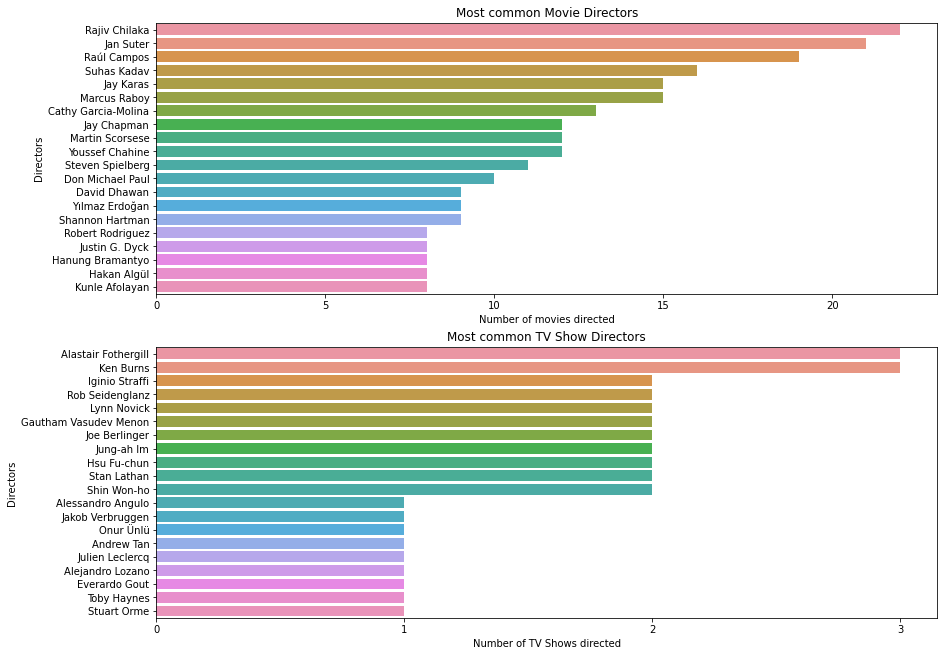

In [128]:
fig, ax = plt.subplots(2,1,figsize=(13,9), constrained_layout=True)
ax[0].set_title('Most common Movie Directors')
ax[0].set_ylabel('Directors')
sns.barplot(x=directorMovie, y=directorMovieIndex, ax=ax[0])
ax[0].set_xlabel('Number of movies directed')

ax[1].set_title('Most common TV Show Directors')
ax[1].set_ylabel('Directors')
ax[1].set_xticks(np.arange(0,4,1))
sns.barplot(x=directorTVShow, y=directorTVShowIndex, ax=ax[1])
ax[1].set_xlabel('Number of TV Shows directed');

TV Shows have the same director directing up to 3 TV Shows.  
Movies have the same director directing up to 22 Movies.

### Cast

In [129]:
data5 = data[~data.cast.isnull()]

In [130]:
cast = data5['cast'].str.split(', ', expand=True)
data5 = pd.concat([data5, cast], axis=1)

In [131]:
data5 = data5.melt(id_vars =['type'], value_vars = [i for i in range(0,len(cast.columns))], value_name = "casts")

In [132]:
data5 = data5[~data5['casts'].isnull()]

In [133]:
castMovie = data5['casts'][data5['type'] == 'Movie'].value_counts()[:20]
castMovieIndex = data5['casts'][data5['type'] == 'Movie'].value_counts()[:20].index
castTVShow = data5['casts'][data5['type'] == 'TV Show'].value_counts()[:20]
castTVShowIndex = data5['casts'][data5['type'] == 'TV Show'].value_counts()[:20].index

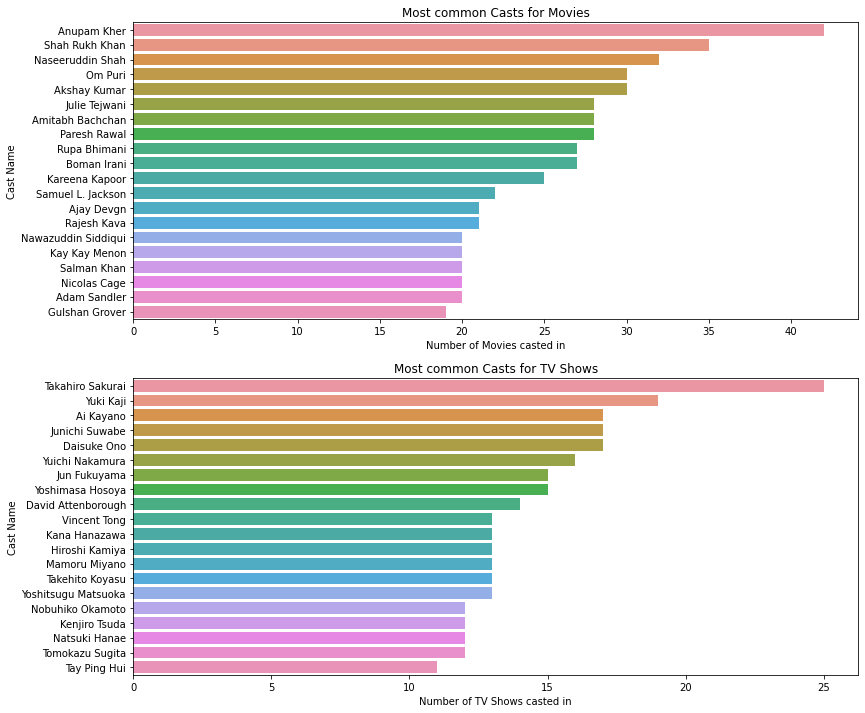

In [134]:
fig, ax = plt.subplots(2,1, figsize=(13,12))
ax[0].set_title('Most common Casts for Movies')
ax[0].set_ylabel('Cast Name')
sns.barplot(x=castMovie, y=castMovieIndex, ax=ax[0])
ax[0].set_xlabel('Number of Movies casted in')

ax[1].set_title('Most common Casts for TV Shows')
ax[1].set_ylabel('Cast Name')
sns.barplot(x=castTVShow, y=castTVShowIndex, ax=ax[1])
ax[1].set_xlabel('Number of TV Shows casted in');

TV Shows have the same cast appearing up to 25 times.  
Movies have the same cast appearing up to 42 times.

### Country

In [135]:
data6 = data[~data['country'].isnull()]

In [136]:
countries = data6['country'].str.split(', ', expand=True)
data6 = pd.concat([data6, countries], axis=1)

In [137]:
data6 = data6.melt(id_vars =['show_id','type','title'], value_vars = [i for i in range(0,len(countries.columns))], value_name = "countries")

In [138]:
data6

,show_id,type,title,variable,countries
0,s1,Movie,Dick Johnson Is Dead,0,United States
1,s2,TV Show,Blood & Water,0,South Africa
2,s5,TV Show,Kota Factory,0,India
3,s8,Movie,Sankofa,0,United States
4,s9,TV Show,The Great British Baking Show,0,United Kingdom
...,...,...,...,...,...
95707,s8802,Movie,Zinzana,11,None
95708,s8803,Movie,Zodiac,11,None
95709,s8805,Movie,Zombieland,11,None
95710,s8806,Movie,Zoom,11,None


In [139]:
data6 = data6[~data6['countries'].isnull()]

In [140]:
data6

,show_id,type,title,variable,countries
0,s1,Movie,Dick Johnson Is Dead,0,United States
1,s2,TV Show,Blood & Water,0,South Africa
2,s5,TV Show,Kota Factory,0,India
3,s8,Movie,Sankofa,0,United States
4,s9,TV Show,The Great British Baking Show,0,United Kingdom
...,...,...,...,...,...
71397,s8404,Movie,The Look of Silence,8,Germany
77328,s6234,Movie,Barbecue,9,Sweden
79373,s8404,Movie,The Look of Silence,9,Netherlands
85304,s6234,Movie,Barbecue,10,United States


In [141]:
countryMovie = data6['countries'][data6['type'] == 'Movie'].value_counts()[:20]
countryMovieIndex = data6['countries'][data6['type'] == 'Movie'].value_counts().index[:20]
countryTVShow = data6['countries'][data6['type'] == 'TV Show'].value_counts()[:20]
countryTVShowIndex = data6['countries'][data6['type'] == 'TV Show'].value_counts().index[:20]

Text(0.5, 0, 'Number of TV Shows')

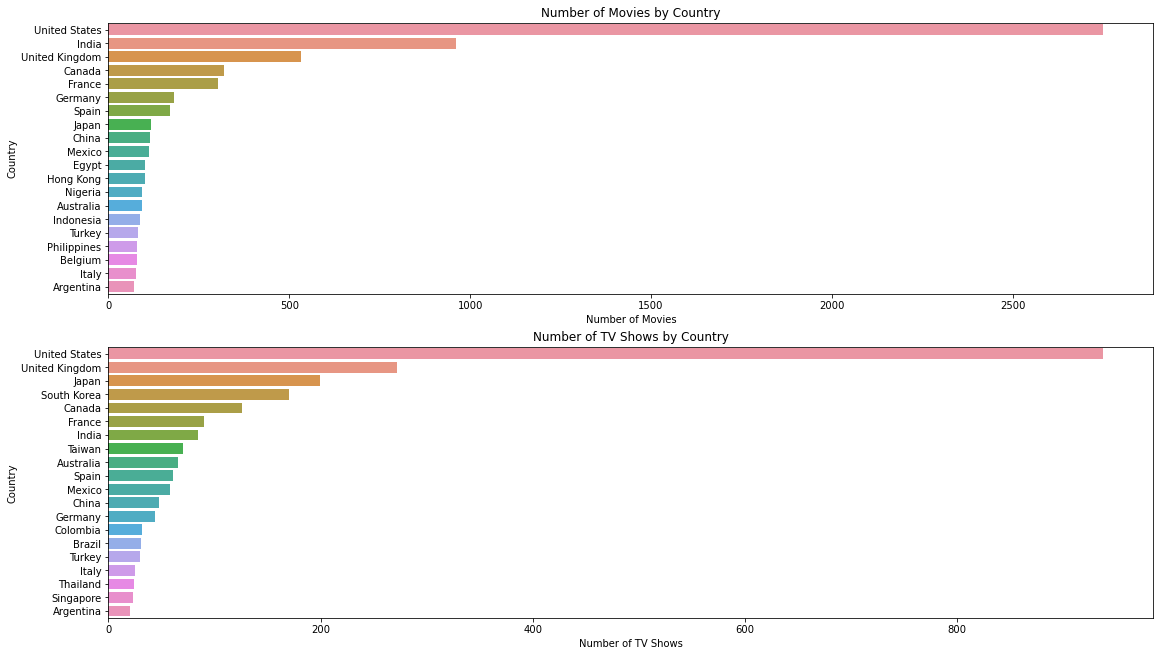

In [142]:
fig, ax = plt.subplots(2,1, figsize=(16,9), constrained_layout=True)
ax[0].set_title('Number of Movies by Country')
ax[0].set_ylabel('Country')
sns.barplot(x=countryMovie, y=countryMovieIndex, ax=ax[0])
ax[0].set_xlabel('Number of Movies')

ax[1].set_title('Number of TV Shows by Country')
ax[1].set_ylabel('Country')
sns.barplot(x=countryTVShow, y=countryTVShowIndex, ax=ax[1])
ax[1].set_xlabel('Number of TV Shows')

In [143]:
data6['countries'][(data6['type'] == 'Movie') & (data6['countries'] == 'South Korea')].count()

61

TV Shows from Japan and South Korea are more prevalent in the content that netflix provides. This is interesting because Movies are the predominant content on Netflix.  
Netflix could have significant viewership in Japan and South Korea, but this does not explain why the movie count is lower from both South Korea and Japan.  
Perhaps Japanese and South Korean TV shows have more appeal to an international audience.

In [144]:
data6

,show_id,type,title,variable,countries
0,s1,Movie,Dick Johnson Is Dead,0,United States
1,s2,TV Show,Blood & Water,0,South Africa
2,s5,TV Show,Kota Factory,0,India
3,s8,Movie,Sankofa,0,United States
4,s9,TV Show,The Great British Baking Show,0,United Kingdom
...,...,...,...,...,...
71397,s8404,Movie,The Look of Silence,8,Germany
77328,s6234,Movie,Barbecue,9,Sweden
79373,s8404,Movie,The Look of Silence,9,Netherlands
85304,s6234,Movie,Barbecue,10,United States


In [145]:
data7 = data[~data['country'].isnull()]

In [146]:
data7['listed_in'].isnull().sum()

0

In [147]:
genres3 = data7['listed_in'].str.split(', ', expand=True)

In [148]:
data7 = pd.concat([data7, genres3], axis=1)

In [149]:
data7 = data7.melt(id_vars =['show_id','type','title'], value_vars = [i for i in range(0,len(genres3.columns))], value_name = "genres")

In [150]:
data7 = data7[~data7['genres'].isnull()]

In [151]:
data7

,show_id,type,title,variable,genres
0,s1,Movie,Dick Johnson Is Dead,0,Documentaries
1,s2,TV Show,Blood & Water,0,International TV Shows
2,s5,TV Show,Kota Factory,0,International TV Shows
3,s8,Movie,Sankofa,0,Dramas
4,s9,TV Show,The Great British Baking Show,0,British TV Shows
...,...,...,...,...,...
23920,s8799,Movie,Zed Plus,2,International Movies
23922,s8801,TV Show,Zindagi Gulzar Hai,2,TV Dramas
23923,s8802,Movie,Zinzana,2,Thrillers
23924,s8803,Movie,Zodiac,2,Thrillers


In [152]:
data6 = data6.set_index(['show_id', 'type', 'title', 'variable'])
data7 = data7.set_index(['show_id', 'type', 'title', 'variable'])

In [153]:
data7 = pd.concat([data6, data7],axis=1).reset_index()

In [154]:
data7

,show_id,type,title,variable,countries,genres
0,s1,Movie,Dick Johnson Is Dead,0,United States,Documentaries
1,s10,Movie,The Starling,0,United States,Comedies
2,s10,Movie,The Starling,1,NaN,Dramas
3,s100,TV Show,On the Verge,0,France,TV Comedies
4,s100,TV Show,On the Verge,1,United States,TV Dramas
...,...,...,...,...,...,...
18425,s998,TV Show,Life in Color with David Attenborough,0,Australia,British TV Shows
18426,s998,TV Show,Life in Color with David Attenborough,1,United Kingdom,Docuseries
18427,s998,TV Show,Life in Color with David Attenborough,2,NaN,International TV Shows
18428,s999,Movie,Searching For Sheela,0,India,Documentaries


In [155]:
data7['countries'] = data7['countries'].fillna(method='ffill')

In [156]:
data7

,show_id,type,title,variable,countries,genres
0,s1,Movie,Dick Johnson Is Dead,0,United States,Documentaries
1,s10,Movie,The Starling,0,United States,Comedies
2,s10,Movie,The Starling,1,United States,Dramas
3,s100,TV Show,On the Verge,0,France,TV Comedies
4,s100,TV Show,On the Verge,1,United States,TV Dramas
...,...,...,...,...,...,...
18425,s998,TV Show,Life in Color with David Attenborough,0,Australia,British TV Shows
18426,s998,TV Show,Life in Color with David Attenborough,1,United Kingdom,Docuseries
18427,s998,TV Show,Life in Color with David Attenborough,2,United Kingdom,International TV Shows
18428,s999,Movie,Searching For Sheela,0,India,Documentaries


In [157]:
japanTVShows = data7[(data7['countries'] == 'Japan') & (data7['type'] == 'TV Show')]

In [158]:
japanTVShows.genres.value_counts()

International TV Shows          145
Anime Series                    136
Romantic TV Shows                21
TV Dramas                        21
Crime TV Shows                   15
Kids' TV                         14
Teen TV Shows                    14
Reality TV                        8
TV Comedies                       8
TV Thrillers                      6
TV Horror                         5
TV Action & Adventure             4
TV Mysteries                      4
Docuseries                        1
TV Shows                          1
Stand-Up Comedy & Talk Shows      1
Name: genres, dtype: int64

In [159]:
japanShowGenres = japanTVShows.genres.value_counts()[:7]
japanShowGenresIndex = japanTVShows.genres.value_counts()[:7].index

Text(0.5, 0, 'Genres')

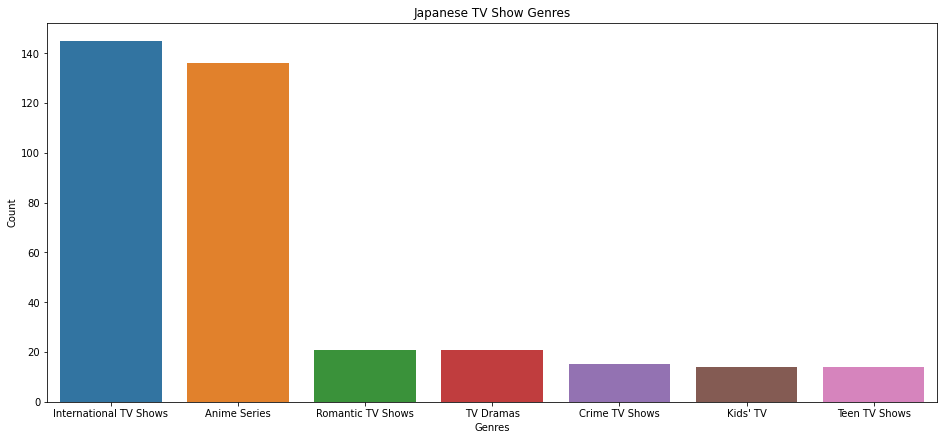

In [160]:
fig, ax = plt.subplots(figsize=(13,6), constrained_layout=True)
sns.barplot(x=japanShowGenresIndex, y=japanShowGenres, order = japanShowGenresIndex)
ax.set_title("Japanese TV Show Genres")
ax.set_ylabel("Count")
ax.set_xlabel("Genres")

'International TV Shows' as a genre does not exactly help in differentiating a TV Shows. Anime Series is a more apt descriptor.  
International TV Shows and Anime Series make up the bulk of Japanese TV Shows.  
Filter all Japan TV Shows by genre = 'International TV Shows' to see how many International TV Shows also overlap as an Anime Series.

In [161]:
international_index = japanTVShows[japanTVShows['genres'] == 'International TV Shows'].index

In [162]:
international_showIDs = japanTVShows.loc[international_index]['show_id'].to_list()

In [163]:
japanTVShows[japanTVShows['show_id'].isin(international_showIDs)]['genres'].value_counts()[:2]

International TV Shows    145
Anime Series              105
Name: genres, dtype: int64

Of the 145 International TV Shows, 105 of the shows are Anime Series.  
This means a large majority of Japanese TV Shows are Anime Series.

In [164]:
SKTVShows = data7[(data7['countries'] == 'South Korea') & (data7['type'] == 'TV Show')]

In [165]:
SKTVShows

,show_id,type,title,variable,countries,genres
66,s1033,TV Show,Love Naggers,0,South Korea,International TV Shows
67,s1033,TV Show,Love Naggers,1,South Korea,Stand-Up Comedy & Talk Shows
101,s105,TV Show,Tayo the Little Bus,0,South Korea,Kids' TV
102,s105,TV Show,Tayo the Little Bus,1,South Korea,Korean TV Shows
130,s1063,TV Show,Law School,0,South Korea,Crime TV Shows
...,...,...,...,...,...,...
18171,s8798,TV Show,Zak Storm,2,South Korea,NaN
18206,s885,TV Show,Move to Heaven,0,South Korea,International TV Shows
18207,s885,TV Show,Move to Heaven,1,South Korea,TV Dramas
18239,s903,TV Show,Mine,0,South Korea,International TV Shows


In [166]:
SKTVShows.genres.value_counts()

International TV Shows          151
Korean TV Shows                 131
Romantic TV Shows                75
TV Dramas                        37
Crime TV Shows                   24
TV Comedies                      17
Kids' TV                         13
TV Action & Adventure             8
Stand-Up Comedy & Talk Shows      4
TV Horror                         3
TV Mysteries                      3
Reality TV                        3
Name: genres, dtype: int64

In [167]:
SKTVShowGenres = SKTVShows.genres.value_counts()[:7]
SKTVShowGenresIndex = SKTVShows.genres.value_counts()[:7].index

Text(0.5, 0, 'Genres')

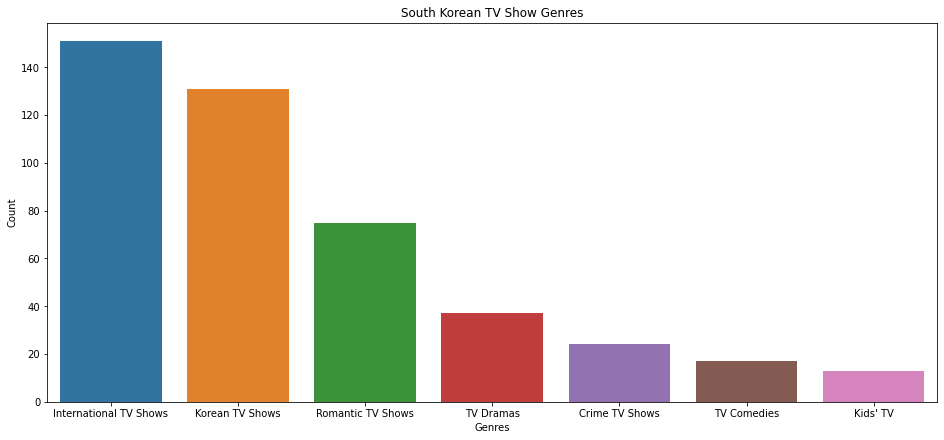

In [168]:
fig, ax = plt.subplots(figsize=(13,6), constrained_layout=True)
sns.barplot(x=SKTVShowGenresIndex, y=SKTVShowGenres, order = SKTVShowGenresIndex)
ax.set_title("South Korean TV Show Genres")
ax.set_ylabel("Count")
ax.set_xlabel("Genres")

Similar to Japan's TV Shows, 'International TV Shows' are the bulk of Korean TV Shows.  
Filter all South Korean TV Shows by genre = 'International TV Shows' to see how many International TV Shows also overlap as Korean TV Shows

In [169]:
SKTVShowGenres

International TV Shows    151
Korean TV Shows           131
Romantic TV Shows          75
TV Dramas                  37
Crime TV Shows             24
TV Comedies                17
Kids' TV                   13
Name: genres, dtype: int64

In [170]:
international_index2 = SKTVShows[SKTVShows['genres'] == 'International TV Shows'].index

In [171]:
international_showIDs2 = SKTVShows.loc[international_index2]['show_id'].to_list()

In [172]:
SKTVShows[SKTVShows['show_id'].isin(international_showIDs2)]['genres'].value_counts()[:6]

International TV Shows    151
Korean TV Shows           121
Romantic TV Shows          75
TV Dramas                  36
Crime TV Shows             24
TV Comedies                16
Name: genres, dtype: int64

Of the 151 International TV Shows, 121 of the shows are Korean TV Shows.  
Of the 131 Korean TV Shows, 10 are not international.

Going back to the Country by Content analysis, it is safe to assume Anime Series type of shows from Japan and Korean TV Shows from South Korea are popular among netflix viewers considering the amount of such types of shows made available by Netflix.

We also remember that Anime Series and Korean TV Shows genres are more common than "Teen TV Shows" for rating_category = Teens.

### Text Analysis of Netflix content description

In [173]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

In [174]:
corpus = data['description']

In [175]:
#stopWords = stopwords.words('english')
#countvec = CountVectorizer(stop_words=stopWords)
countvec = CountVectorizer(stop_words='english')

In [176]:
tf = countvec.fit_transform(corpus)

In [177]:
countvec.get_feature_names_out()

array(['000', '007', '009', ..., 'łukasz', 'ōarai', 'şeref'], dtype=object)

In [178]:
#term frequency
tf.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [179]:
#Term Frequency df
pd.DataFrame(tf.toarray(), columns = countvec.get_feature_names_out())

,000,007,009,10,100,1000,102,108,10th,11,...,zé,álex,álvaro,ángel,émile,ömer,über,łukasz,ōarai,şeref
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8803,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8804,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8805,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [180]:
idf = TfidfTransformer()

In [181]:
idf.fit(tf)

TfidfTransformer()

In [182]:
#inverse document frequency weights
idf.idf_

array([6.41985403, 8.47397777, 9.3902685 , ..., 9.3902685 , 9.3902685 ,
       9.3902685 ])

In [183]:
pd.DataFrame(idf.idf_, columns=['idf weights'], index=countvec.get_feature_names_out())

,idf weights
000,6.419854
007,8.473978
009,9.390268
10,6.276753
100,7.138977
...,...
ömer,9.390268
über,8.984803
łukasz,9.390268
ōarai,9.390268


In [184]:
tfidf = idf.transform(tf)

In [185]:
#tf-idf (tf * idf)
tfidf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

#### Calculate the cosine similarity using dot product of the TF-IDF matrix

In [186]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim1 = linear_kernel(tfidf, tfidf)
print(cosine_sim1)

[[1.         0.         0.         ... 0.         0.01538292 0.        ]
 [0.         1.         0.         ... 0.         0.         0.        ]
 [0.         0.         1.         ... 0.         0.         0.02230089]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.01538292 0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.02230089 ... 0.         0.         1.        ]]


In [187]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(tfidf)
print(cosine_sim)

[[1.         0.         0.         ... 0.         0.01538292 0.        ]
 [0.         1.         0.         ... 0.         0.         0.        ]
 [0.         0.         1.         ... 0.         0.         0.02230089]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.01538292 0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.02230089 ... 0.         0.         1.        ]]


### Recommender function to output Netflix content depending on the cosine similarity of the content's description

In [188]:
titleDict = dict(zip(data['title'],data.index))

In [189]:
titleDict['The 100']

1878

In [190]:
def recommend(title, similarity_matrix, dictionary, df):
    #retrieve index of title
    index = dictionary[title]
    
    #pair the scores with the index of each title
    similarity_scores = list(enumerate(similarity_matrix[index]))
    
    #sort the enumerated scores by the score(x[1]) instead of index(x[0]); sort by descending for highest scores
    highest_similarity_scores = sorted(similarity_scores, key=lambda x:x[1], reverse=True)
    top10 = highest_similarity_scores[1:11]
    
    #get titles and scores from the sorted pairs
    titles_index = [pair[0] for pair in top10]
    titles = df['title'].iloc[titles_index]
    scores = [pair[1] for pair in top10]
    
    return pd.DataFrame({'title': titles, 'cosine_similarity': scores})

A TV Show I watched on Netflix recently: 'The 100'.

In [191]:
data[data['title'] == 'The 100']['description'].tolist()

["A century after Earth was devastated by a nuclear apocalypse, 100 space station residents are sent to the planet to determine whether it's habitable."]

Get recommendations for shows similar to 'The 100'

In [192]:
recommend('The 100', cosine_sim, titleDict, data)

,title,cosine_similarity
5650,Star Trek: Deep Space Nine,0.164982
2798,3022,0.162886
8500,The Search for Life in Space,0.155467
6827,Gargantia on the Verdurous Planet,0.152465
8143,Sym-Bionic Titan,0.150751
7747,Planet Earth II,0.148097
8448,The Peacemaker,0.147558
2155,The Magic School Bus Rides Again Kids In Space,0.139818
6372,Brave New Jersey,0.136736
1405,Outside the Wire,0.131270


In [193]:
data['description'][data['title'] == 'Star Trek: Deep Space Nine'].tolist()

['In this "Star Trek" spin-off, Commander Sisko leads the multi-species crew of Deep Space Nine, a Federation space station with a complex mission.']

In [194]:
data['description'][data['title'] == '3022'].tolist()

['Stranded when the Earth is suddenly destroyed in a mysterious cataclysm, the astronauts aboard a marooned space station slowly lose their minds.']

In [195]:
data['description'][data['title'] == 'The Search for Life in Space'].tolist()

["To determine whether we're alone in the universe, astrobiologists look to Jupiter, Mars and, closer to home, extreme environments on Earth."]

In [196]:
data['description'][data['title'] == 'Gargantia on the Verdurous Planet'].tolist()

['After falling through a wormhole, a space-dwelling teen mecha pilot awakes to find himself amid the inhabitants of a strange planet called ... Earth.']

In [197]:
data['description'][data['title'] == 'Sym-Bionic Titan'].tolist()

['Aliens fleeing their planet land on Earth, pose as teenagers and fight off mutant space monsters by joining forces to become a powerful giant robot.']

The Top 5 titles by cosine similarity are quite close in description where the shows seems to be related to outer space and other planets. While the other titles may mention 'other species'/aliens, 'The 100' doesn't mention alien life form but it is within the realm of possibility with regards to outer space. Overall, some recommendations that I personally would look into.

### Overall Findings / Analyses / Recommendations

#### Rating_Category
* About 23% of shows on Netflix are for Children, (30+23)% for Teenagers, and (47+30+23)% for Adults.

#### Genre
- Comedies and Dramas are among the most popular genres across all 3 rating_category.  
- Movies are similar between Adults and Teens in genre rankings; for TV shows, Adults lean towards the Crime genre and Teens towards the Romance genre.  
- 12.39% of netflix content is truly targeted at children (of Kids' TV genre / Children & Family Movies genre).  
- "Kids' TV" genre is the top genre for TV shows of rating_category = Kids and also makes up 57% of Children TV Shows.  
- "Teen TV Shows" did not even rank among the Top 10 genres for TV Shows of rating_category = Teens  
- Total number of shows (not limited to rating_category = Teens) with "Teen TV Shows" genre is <100.  

__Recommendations:__  
- Increase amount of TV Shows that appeal to the Kids rating_category  
- Revamp the "Teen TV Shows" genre or check if they are being appropriately tagged to content.

#### Dates 
<u>Year</u>
- Netflix adds about 36% of content within the same year of said content's release. 17% within 1 year, and 8% within 2 years.  
- On the surface this looks decent, but of the 36% of content added within the same year, a portion will inevitably be Netflix originals, meaning 36% is an artificially inflated figure.

__Recommendations:__  
- Netflix can try to reduce the interval between the release date of a show and the time netflix takes to add the show to their platform.
- A new column 'Netflix_Original' can be added to filter content and only apply the metric to non-Netflix originals for how fast the content is added to Netflix's platform


<u>Month</u>  
- Content additions peak in **July** and **December**, with July having slightly more Movies than TV shows and vice versa for December.
- Content additions trough in **February** and **May** with February having about 30% less additions compared to July.

__Recommendations:__  
- Operational optimizations can be factored in for July & December, May & February, i.e. server bandwidth.  

<u>Day of Month</u>
- Content additions are highest on the 1st and 15th day of each month.  
- 1, 15, 2, 16, 31, 20, 19, 30 are among the dates of the month for highest number of content additions.

**Recommendations:**  
- Since (1,2) and (30,31) are **consecutive days**, Operational optimizations can be arranged for the week of those 4 dates.
- (15,16) can be considered as well as 15th has the second highest average number of content additions.

<u>Weekday</u>
- Content Additions occur the most on Friday and the least on the Weekends (Saturday and Sunday) and the first day of the week. (Monday)
- More work to be done on weekdays and less on weekends is more of a common thing and not so much specific to Netflix, hence no recommendation will be made.

#### Cast / Director 
- TV Shows/Movies have the same director directing up to 22 different works on Netflix.
- TV Shows/Movies have the same cast appearing in up to 42 different works on Netflix.  

**Recommendations:**  
- Netflix can look to leverage certain casts' familiarity with viewers created from the high number of times they appear in netflix content to incorporate these people into their marketing strategies. Selected casts will depend on their content's viewership demographics.  
- Directors with high accolades/who have produced popular content on Netflix can also be brought into the spotlight to raise user engagement with Netflix's viewers with upcoming works/teasers/interviews by such directors.

#### Country
- USA and UK content are the most common on Netflix regardless of content type.
- However, as movies are the predominant content type on Netflix, it would be more common to observe a country produce more movies as compared to TV shows. This is not the case for Japan and Korea as they come in 3rd and 4th for number of TV Shows, but much lower for moviess.
- This is likely attributed to the popularity of Anime Series and Korean TV Shows as these genres make up the bulk of the TV shows available on Netflix from Japan and Korea.

**Recommendations:**  
- As these genres lead in popularity for Japan and Korean TV shows, Netflix should look to more specifically categorize these genres into sub-genres.

>```
japanTVShows.genres.value_counts()
International TV Shows          145
Anime Series                    136
Romantic TV Shows                21
TV Dramas                        21
Crime TV Shows                   15
Kids' TV                         14
Teen TV Shows                    14
>```